In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [2]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target = pd.DataFrame(iris['target'], columns=['Target'])
target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [4]:
total = pd.concat([data, target], axis=1)
total.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#split the dataset into two of features and labels
X = total.drop(['Target'], axis=1)
y = total['Target']

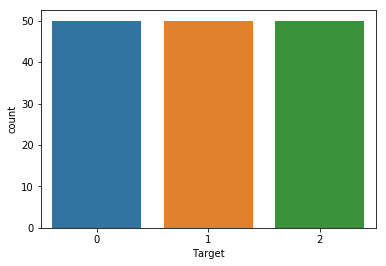

In [6]:
ax = sns.countplot(y)
plt.show()

To be honest, count plot was supposed to be what it is showing as there ar equal number of every species of flower

In [7]:
#Check the discription of the features.
# From this you can find if there are any missing values in the dataset
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


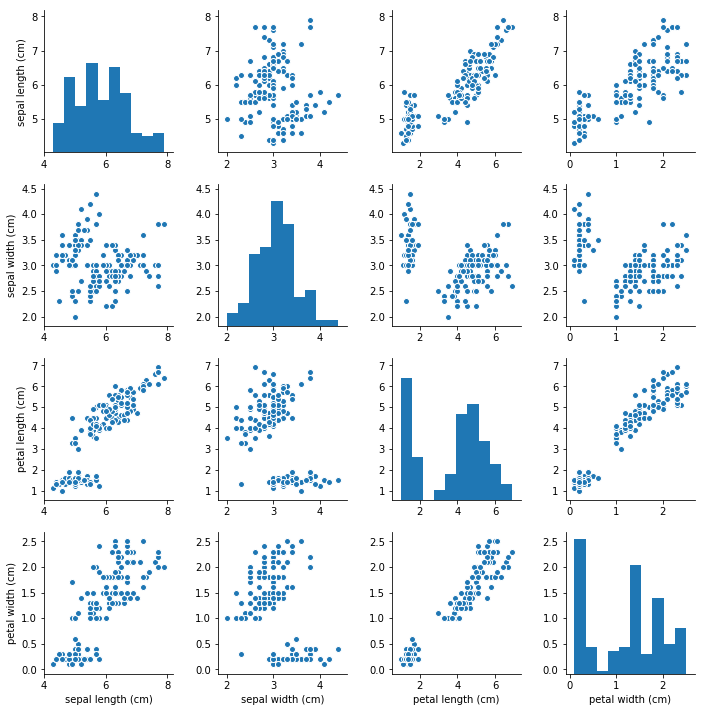

In [9]:
#compare every feature with every other feature
sns.pairplot(data, kind = 'scatter')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 100)

#test_size = 0.20 refers to training data size of 80% and test data size of 20%

# 1. K-NEAREST NEIGHBORS FOR CLASSIFICATION

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 35)   #initially setting k = 35

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

In [13]:
prediction = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(prediction, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.83      0.83      0.83         6
          2       0.92      0.92      0.92        13

avg / total       0.93      0.93      0.93        30



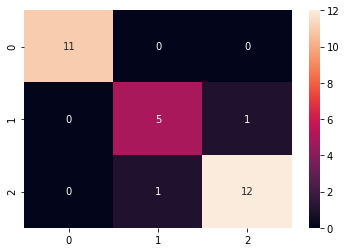

In [15]:
cm = confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

As can be seen from heat map some of our predictions seems to be wrong.
We will try to corect these and try to achieve maximum efficiency by optimising k value 

CHOOSING THE VALUE OF K

#we will plot the graph for different values k versus the corresponding accuracy score to fund the optimal k value

In [16]:
acc_score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    prediction_y = knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, prediction_y))

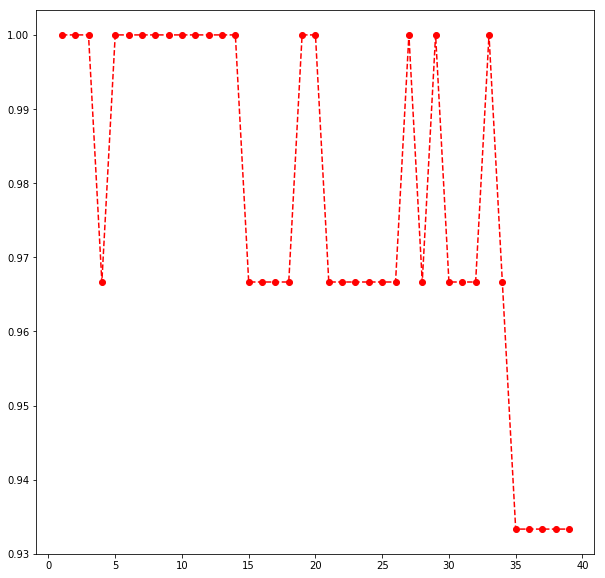

In [17]:
plt.figure(figsize= (10,10))
plt.plot(range(1,40), acc_score, marker = 'o', linestyle='dashed', color = 'r')
plt.show()

As it can be observed from the above graph, for maximum efficiency the optimal value of k value lies in the range of 
1 to 3 and or 5 to 12.

Lets check the accuracy by using different value of k.

In [18]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
print("Accuracy score: {}".format(accuracy_score(y_pred, y_test) * 100))

Accuracy score: 100.0


In [21]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00         6
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        30



With k =10 the accuracy changes from 97% to 100% 

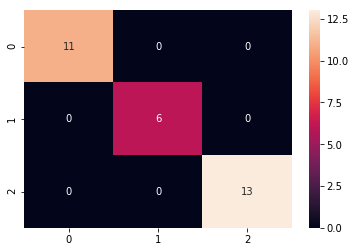

In [22]:
#plotting confusion matrix and heat map
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

From this heat map it can be concluded that all our predictions were corect

# 2 . SUPPORT VECTOR MACHINES FOR CLASSIFICATION

In [23]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', C=10, gamma = 40)

selecting random values of parameters such as kernel, C, gamma

In [24]:
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=40, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
svc_pred = svc.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

print(accuracy_score(svc_pred, y_test))

0.7


In [27]:
print(classification_report(svc_pred, y_test))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78         7
          1       1.00      0.40      0.57        15
          2       0.62      1.00      0.76         8

avg / total       0.81      0.70      0.67        30



The accuracy of the model turn out to be 70 %.
We will try to improve the accuracy by finding the most effecient values for SVM parameters 

In [28]:
#import GridSearchCV 
from sklearn.model_selection import GridSearchCV

hyperparameters = ({'C': [0.001, 0.01, 10, 100, 1000], 'gamma': [1, 5, 10, 20, 30], 'kernel': ['rbf', 'linear']})

In [29]:
grid = GridSearchCV(SVC(), hyperparameters, refit=True, verbose=3)

In [30]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.36585365853658536, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.375, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.358974358974359, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=1, kernel=linear, score=0.36585365853658536, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.375, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=1, kernel=linear, score=0.358974358974359, total=   0.0s
[CV] C=0.001, gamma=5, kernel=rbf ..........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.926829268292683, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............. C=10, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.926829268292683, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.925, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .......... C=10, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=10, gamma=5, kernel=rbf .......................................
[CV]  C=10, gamma=5, kernel=rbf, score=0.8780487804878049, total=   0.0

[CV] ........ C=100, gamma=30, kernel=linear, score=1.0, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.926829268292683, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........... C=1000, gamma=1, kernel=rbf, score=0.9, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9743589743589743, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.926829268292683, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.925, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ........ C=1000, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1000, gamma=5, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 10, 100, 1000], 'gamma': [1, 5, 10, 20, 30], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [31]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [32]:
svc_grid = SVC(kernel = 'rbf', C=10, gamma=1)

In [33]:
svc_grid.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
svc_predict = svc_grid.predict(X_test)

In [35]:
print(accuracy_score(svc_predict, y_test))

0.966666666667


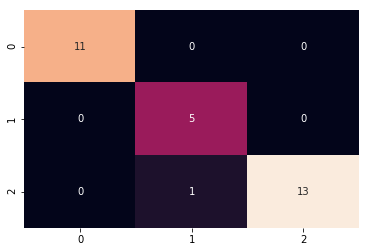

In [36]:
conf_mat = confusion_matrix(svc_predict, y_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.show()

So the accuracy of the model increased significantly from 70% to 97% by finding the most suitable values for 
the SVM parameters